Course Two Task 2: Investigate Credit One data 

1. Import Libraries

In [1]:
# Import libraries used

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pymysql
import pandas_profiling

#SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sqlalchemy import create_engine

#helpers
%matplotlib inline

2. Read data using Pandas

In [2]:
# Import file and store results into data dataframe

data = pd.read_csv('CreditOne_Cleaned.csv')

# Get intial row and column count
data.shape

(30000, 25)

3. Investigate data

In [3]:
# Check the Top 5 rows of the data

data.head(5)

ID  LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university         1   24      2      2     -1   
1   2     120000  female  university         2   26     -1      2      0   
2   3      90000  female  university         2   34      0      0      0   
3   4      50000  female  university         1   37      0      0      0   
4   5      50000    male  university         1   57     -1      0     -1   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -1  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                     default  
1      1000         0      2000                     default  
2      1000      1000      5000                 not default  
3      1100      1069      1000                 not default  
4      9000       689       679                 not default  

[5 rows x 25 columns]

In [4]:
# Verify the data types

data.dtypes

ID                             int64
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

4. Prepare data prior to Analysis

In [5]:
# Check for empty rows

print(data.isnull().sum())

# Get resultant row and column count
data.shape

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


(30000, 25)

In [6]:
# Check for duplicates

duplicate_rows_df = data[data.duplicated()]

print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 25)


In [7]:
# Use Pandas profiling to create a preliminary EDA and save results to a file 

profile = pandas_profiling.ProfileReport(data)
profile.to_file("C2-T2.html")

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# convert the Object data type features into Category data types 

data["default payment next month"] = data["default payment next month"].astype('category')
data["SEX"] = data["SEX"].astype('category')
data["EDUCATION"] = data["EDUCATION"].astype('category')

data.dtypes

ID                               int64
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                         int64
AGE                              int64
PAY_0                            int64
PAY_2                            int64
PAY_3                            int64
PAY_4                            int64
PAY_5                            int64
PAY_6                            int64
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month    category
dtype: object

In [9]:
# Encode the text features as numeric

data["SEX_code"] = data["SEX"].cat.codes
data["EDUCATION_code"] = data["EDUCATION"].cat.codes
data["Default_Condition_code"] = data["default payment next month"].cat.codes

data.head()

ID  LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university         1   24      2      2     -1   
1   2     120000  female  university         2   26     -1      2      0   
2   3      90000  female  university         2   34      0      0      0   
3   4      50000  female  university         1   37      0      0      0   
4   5      50000    male  university         1   57     -1      0     -1   

   PAY_4  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     -1  ...         0       689         0         0         0         0   
1      0  ...         0      1000      1000      1000         0      2000   
2      0  ...      1518      1500      1000      1000      1000      5000   
3      0  ...      2000      2019      1200      1100      1069      1000   
4      0  ...      2000     36681     10000      9000       689       679   

   default payment next month  SEX_code  EDUCATION_code  \
0                     default         0               3   
1                     default         0               3   
2                 not default         0               3   
3                 not default         0               3   
4                 not default         1               3   

   Default_Condition_code  
0                       0  
1                       0  
2                       1  
3                       1  
4                       1  

[5 rows x 28 columns]

In [10]:
# Discretize LIMIT_BAL

Limit_Buckets = [1, 5, 50000, 140000, 240000, 1000000]

data['LIMIT_BAL_Label'] = pd.cut(data['LIMIT_BAL'],Limit_Buckets, labels = False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  int64   
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  int64   
 7   PAY_2                       30000 non-null  int64   
 8   PAY_3                       30000 non-null  int64   
 9   PAY_4                       30000 non-null  int64   
 10  PAY_5                       30000 non-null  int64   
 11  PAY_6                       30000 non-null  int64   
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

In [11]:
# Count and sum of Limit_Bal by Limit_bal_label

FeatureAgg= pd.pivot_table(data,  values=['LIMIT_BAL'], index =['LIMIT_BAL_Label'],
               aggfunc=[len,np.sum],fill_value=0)

print(FeatureAgg)

                      len         sum
                LIMIT_BAL   LIMIT_BAL
LIMIT_BAL_Label                      
1                    7676   270232000
2                    7614   740850000
3                    7643  1470740000
4                    7067  2542707680


In [12]:
# Discretize Age

Age_Buckets = [1, 9, 19, 29, 39, 49, 59, 69, 79, 89]
data['Age_Label'] = pd.cut(data['AGE'],Age_Buckets, labels = False)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30000 non-null  int64   
 1   LIMIT_BAL                   30000 non-null  int64   
 2   SEX                         30000 non-null  category
 3   EDUCATION                   30000 non-null  category
 4   MARRIAGE                    30000 non-null  int64   
 5   AGE                         30000 non-null  int64   
 6   PAY_0                       30000 non-null  int64   
 7   PAY_2                       30000 non-null  int64   
 8   PAY_3                       30000 non-null  int64   
 9   PAY_4                       30000 non-null  int64   
 10  PAY_5                       30000 non-null  int64   
 11  PAY_6                       30000 non-null  int64   
 12  BILL_AMT1                   30000 non-null  int64   
 13  BILL_AMT2       

In [13]:
# Count of Age by Age_label

FeatureAgg= pd.pivot_table(data,  values=['AGE'], index =['Age_Label'],
               aggfunc=[len],fill_value=0)

print(FeatureAgg)

             len
             AGE
Age_Label       
2           9618
3          11238
4           6464
5           2341
6            314
7             25


In [14]:
# Verify the changes made 

data.head()

ID  LIMIT_BAL     SEX   EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   1      20000  female  university         1   24      2      2     -1   
1   2     120000  female  university         2   26     -1      2      0   
2   3      90000  female  university         2   34      0      0      0   
3   4      50000  female  university         1   37      0      0      0   
4   5      50000    male  university         1   57     -1      0     -1   

   PAY_4  ...  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     -1  ...         0         0         0         0   
1      0  ...      1000      1000         0      2000   
2      0  ...      1000      1000      1000      5000   
3      0  ...      1200      1100      1069      1000   
4      0  ...     10000      9000       689       679   

   default payment next month  SEX_code  EDUCATION_code  \
0                     default         0               3   
1                     default         0               3   
2                 not default         0               3   
3                 not default         0               3   
4                 not default         1               3   

   Default_Condition_code  LIMIT_BAL_Label  Age_Label  
0                       0                1          2  
1                       0                2          2  
2                       1                2          3  
3                       1                1          3  
4                       1                1          5  

[5 rows x 30 columns]

5. Gain basic insights from data

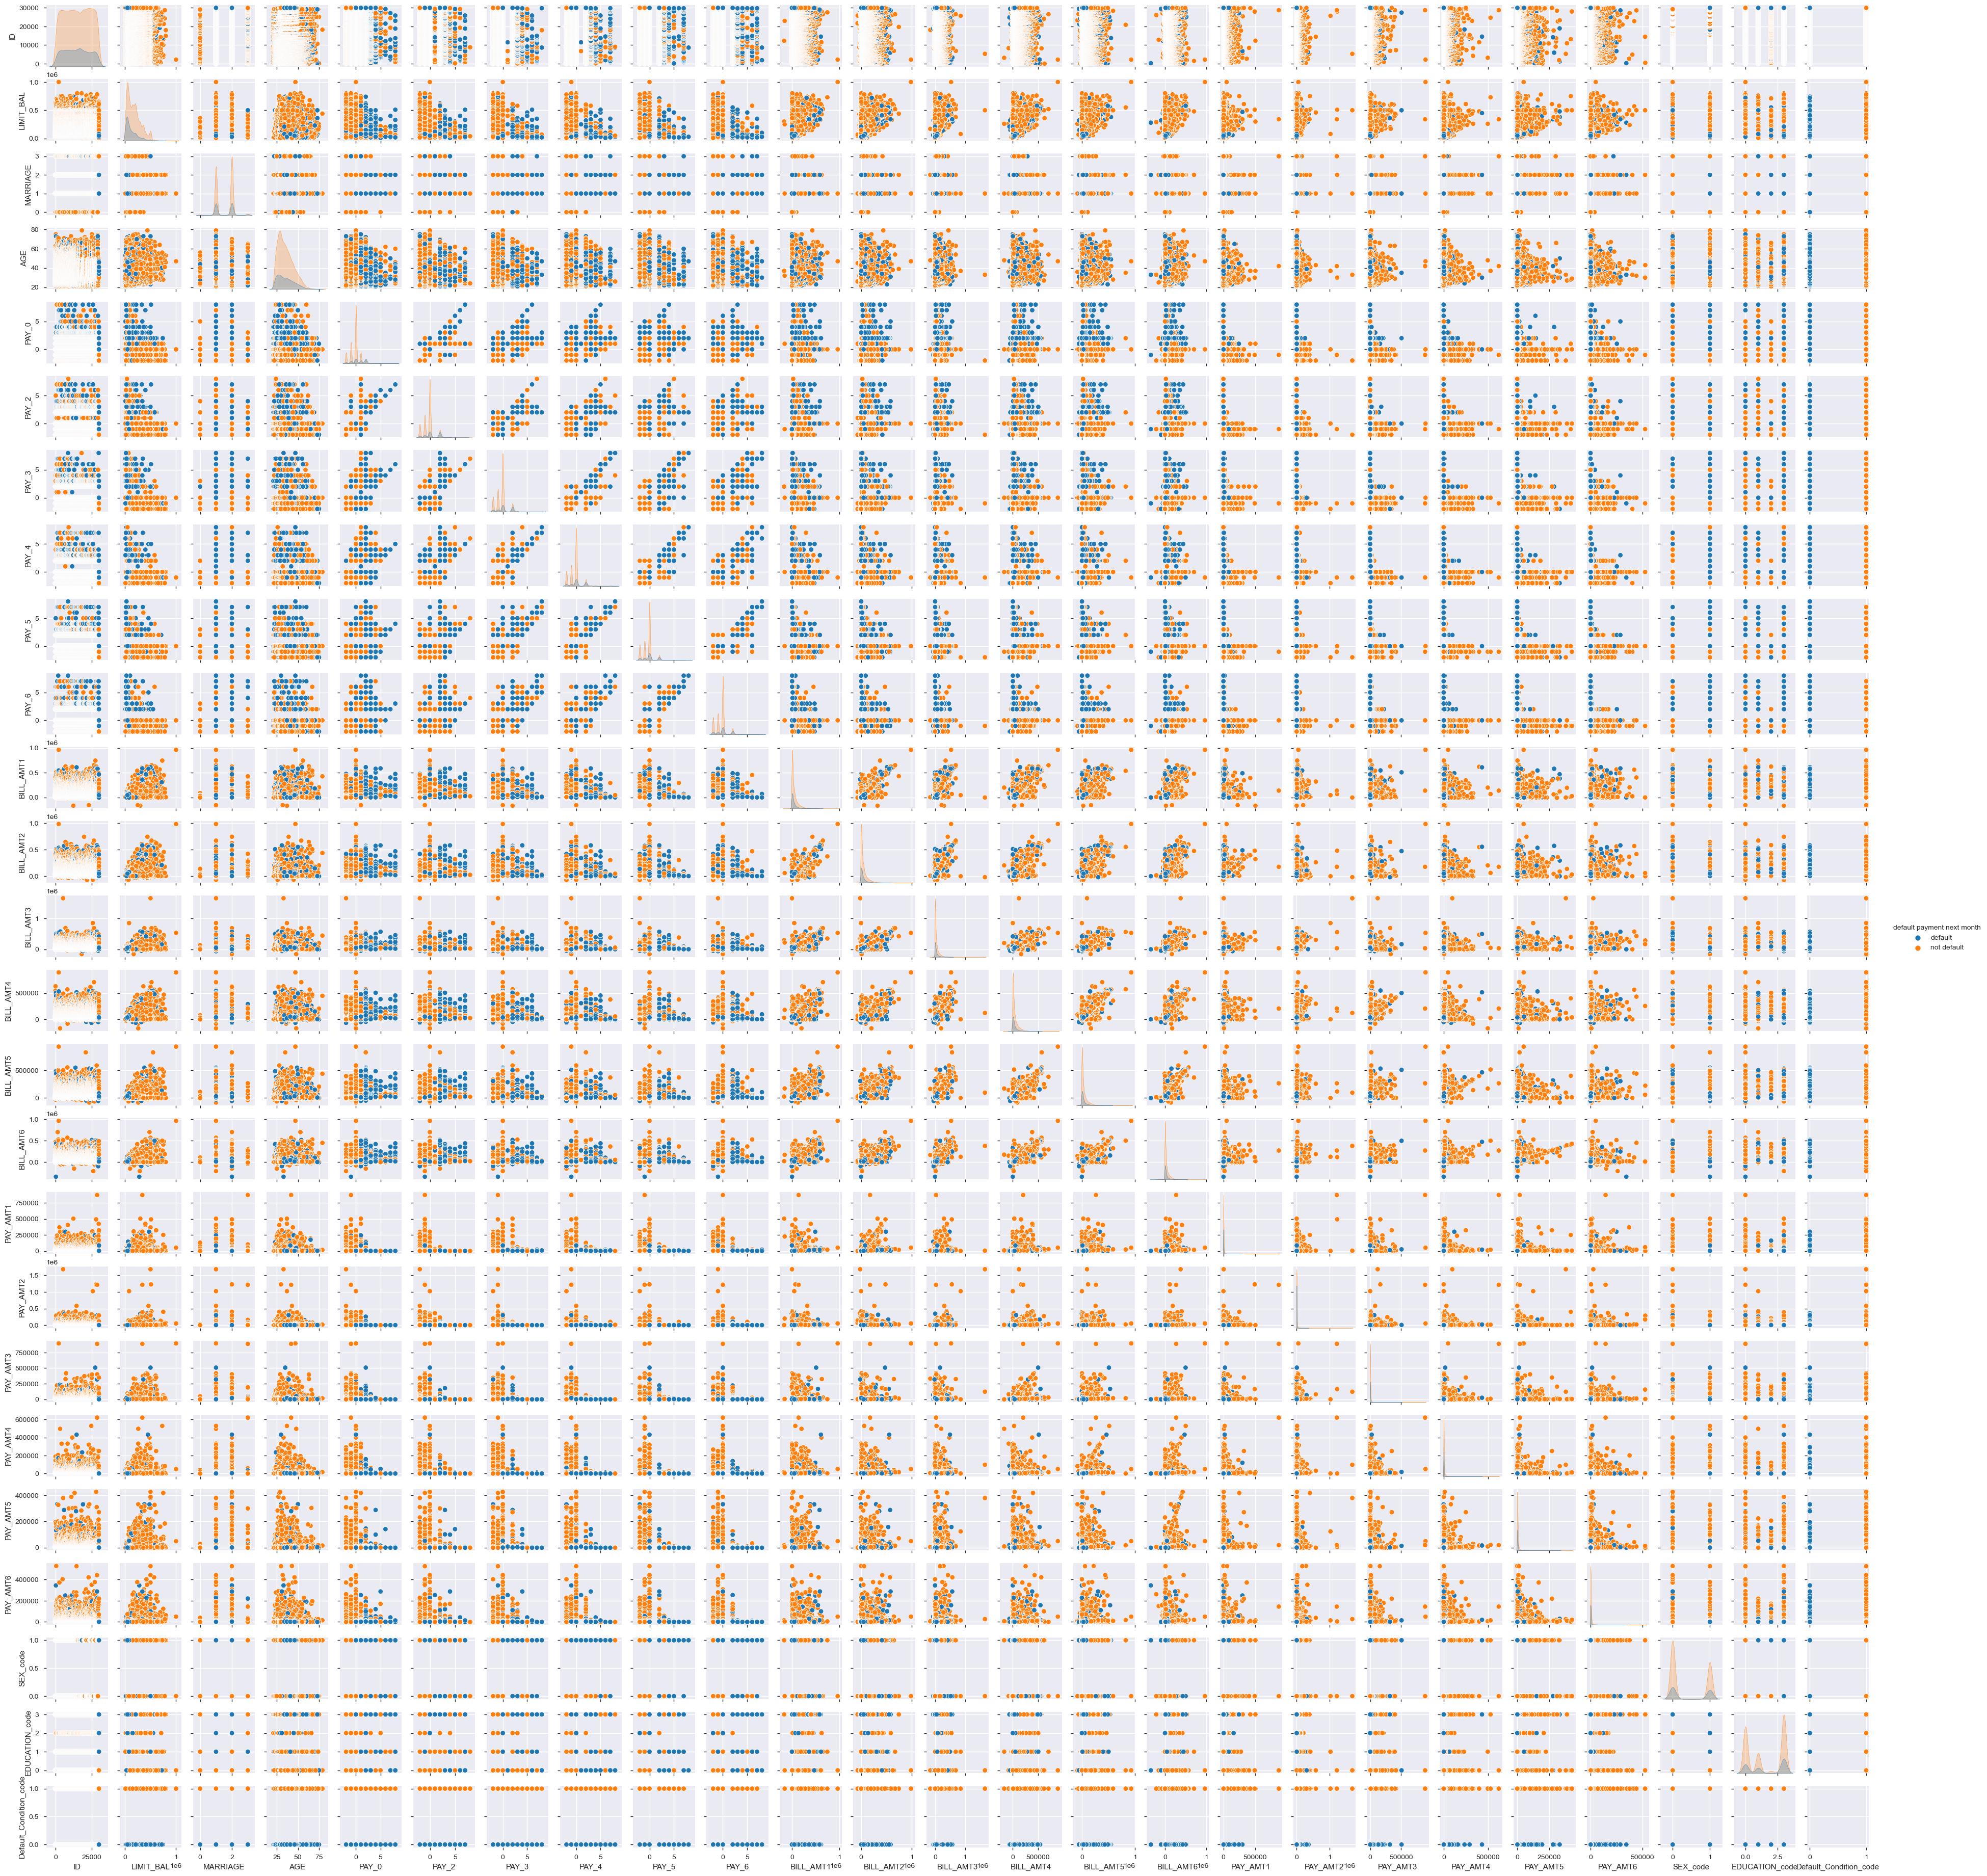

In [40]:
sns.pairplot(data, hue='default payment next month', height=1.5);

In [21]:
# Obtain basic information from the data

data.describe()

ID       LIMIT_BAL      MARRIAGE           AGE         PAY_0  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.551867     35.485500     -0.016700   
std     8660.398374   129747.661567      0.521970      9.217904      1.123802   
min        1.000000    10000.000000      0.000000     21.000000     -2.000000   
25%     7500.750000    50000.000000      1.000000     28.000000     -1.000000   
50%    15000.500000   140000.000000      2.000000     34.000000      0.000000   
75%    22500.250000   240000.000000      2.000000     41.000000      0.000000   
max    30000.000000  1000000.000000      3.000000     79.000000      8.000000   

              PAY_2         PAY_3         PAY_4         PAY_5         PAY_6  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.133767     -0.166200     -0.220667     -0.266200     -0.291100   
std        1.197186      1.196868      1.169139      1.133187      1.149988   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  ...  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   ...  5.921163e+03    5225.68150    4826.076867    4799.387633   
std    ...  2.304087e+04   17606.96147   15666.159744   15278.305679   
min    ...  0.000000e+00       0.00000       0.000000       0.000000   
25%    ...  8.330000e+02     390.00000     296.000000     252.500000   
50%    ...  2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    ...  5.000000e+03    4505.00000    4013.250000    4031.500000   
max    ...  1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6      SEX_code  EDUCATION_code  Default_Condition_code  \
count   30000.000000  30000.000000    30000.000000            30000.000000   
mean     5215.502567      0.396267        1.598100                0.778800   
std     17777.465775      0.489129        1.371656                0.415062   
min         0.000000      0.000000        0.000000                0.000000   
25%       117.750000      0.000000        0.000000                1.000000   
50%      1500.000000      0.000000        1.000000                1.000000   
75%      4000.000000      1.000000        3.000000                1.000000   
max    528666.000000      1.000000        3.000000                1.000000   

       LIMIT_BAL_Label     Age_Label  
count     30000.000000  30000.000000  
mean          2.470033      3.085667  
std           1.109959      0.973872  
min           1.000000      2.000000  
25%           1.000000      2.000000  
50%           2.000000      3.000000  
75%           3.000000      4.000000  
max           4.000000      7.000000  

[8 rows x 27 columns]

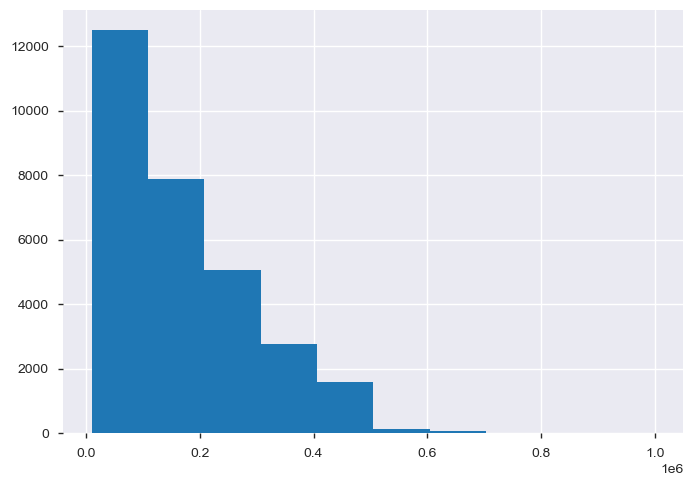

In [30]:
plt.hist(data['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <BarContainer object of 4 artists>)

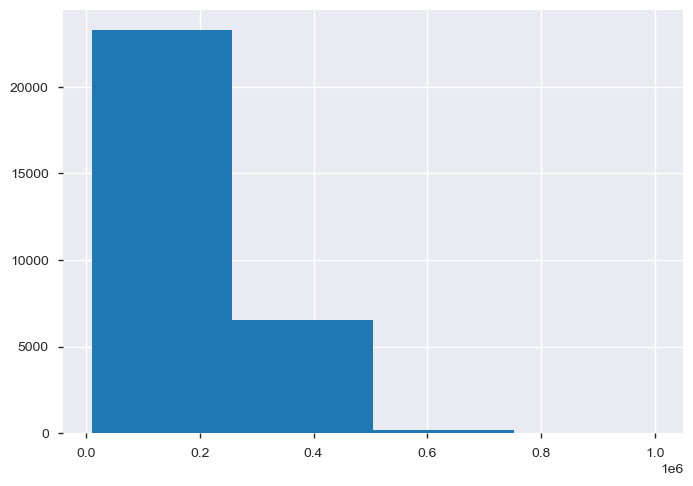

In [31]:
plt.hist(data['LIMIT_BAL'], bins=4)

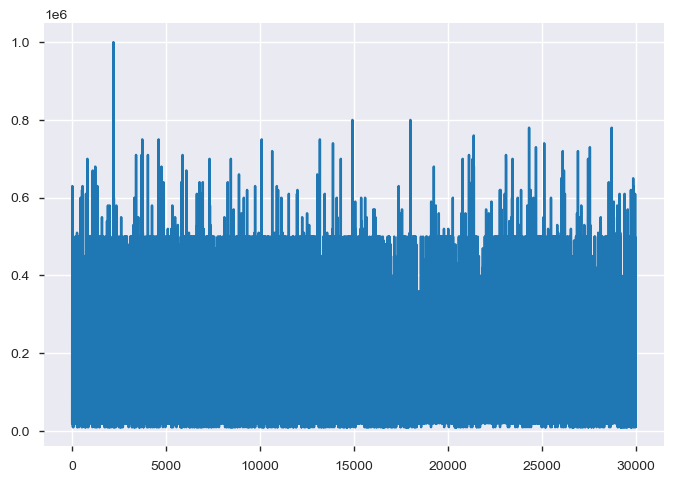

In [32]:
plt.plot(data['LIMIT_BAL'])
plt.show()

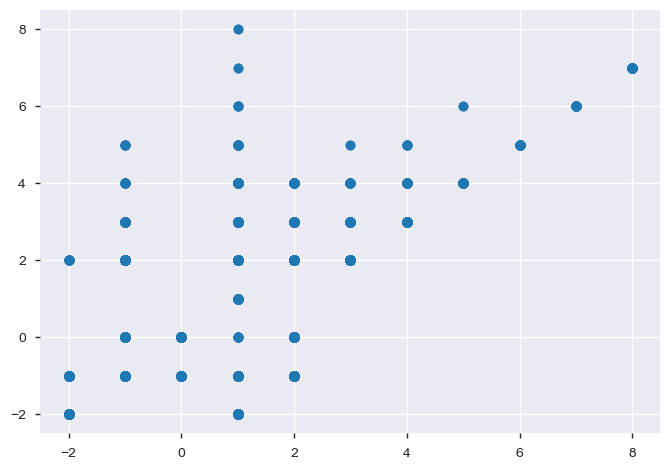

In [45]:
x = data['PAY_0']
y = data['PAY_2']

plt.scatter(data['PAY_0'],data['PAY_2'])
plt.show()

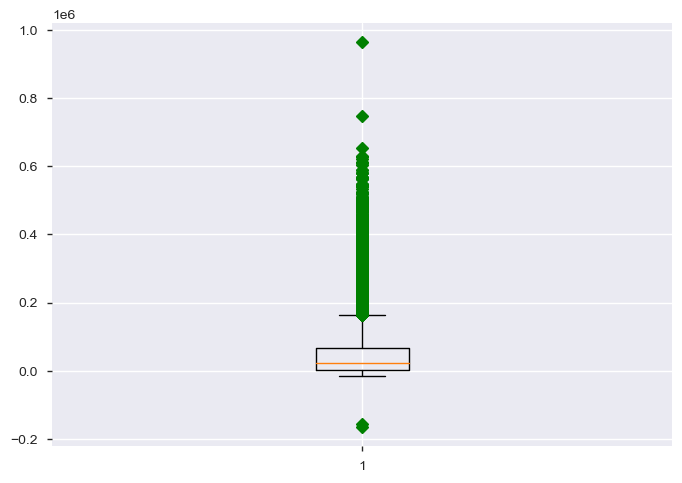

In [34]:
A = data['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

Text(0.5, 1.0, 'MARRIAGE Histogram')

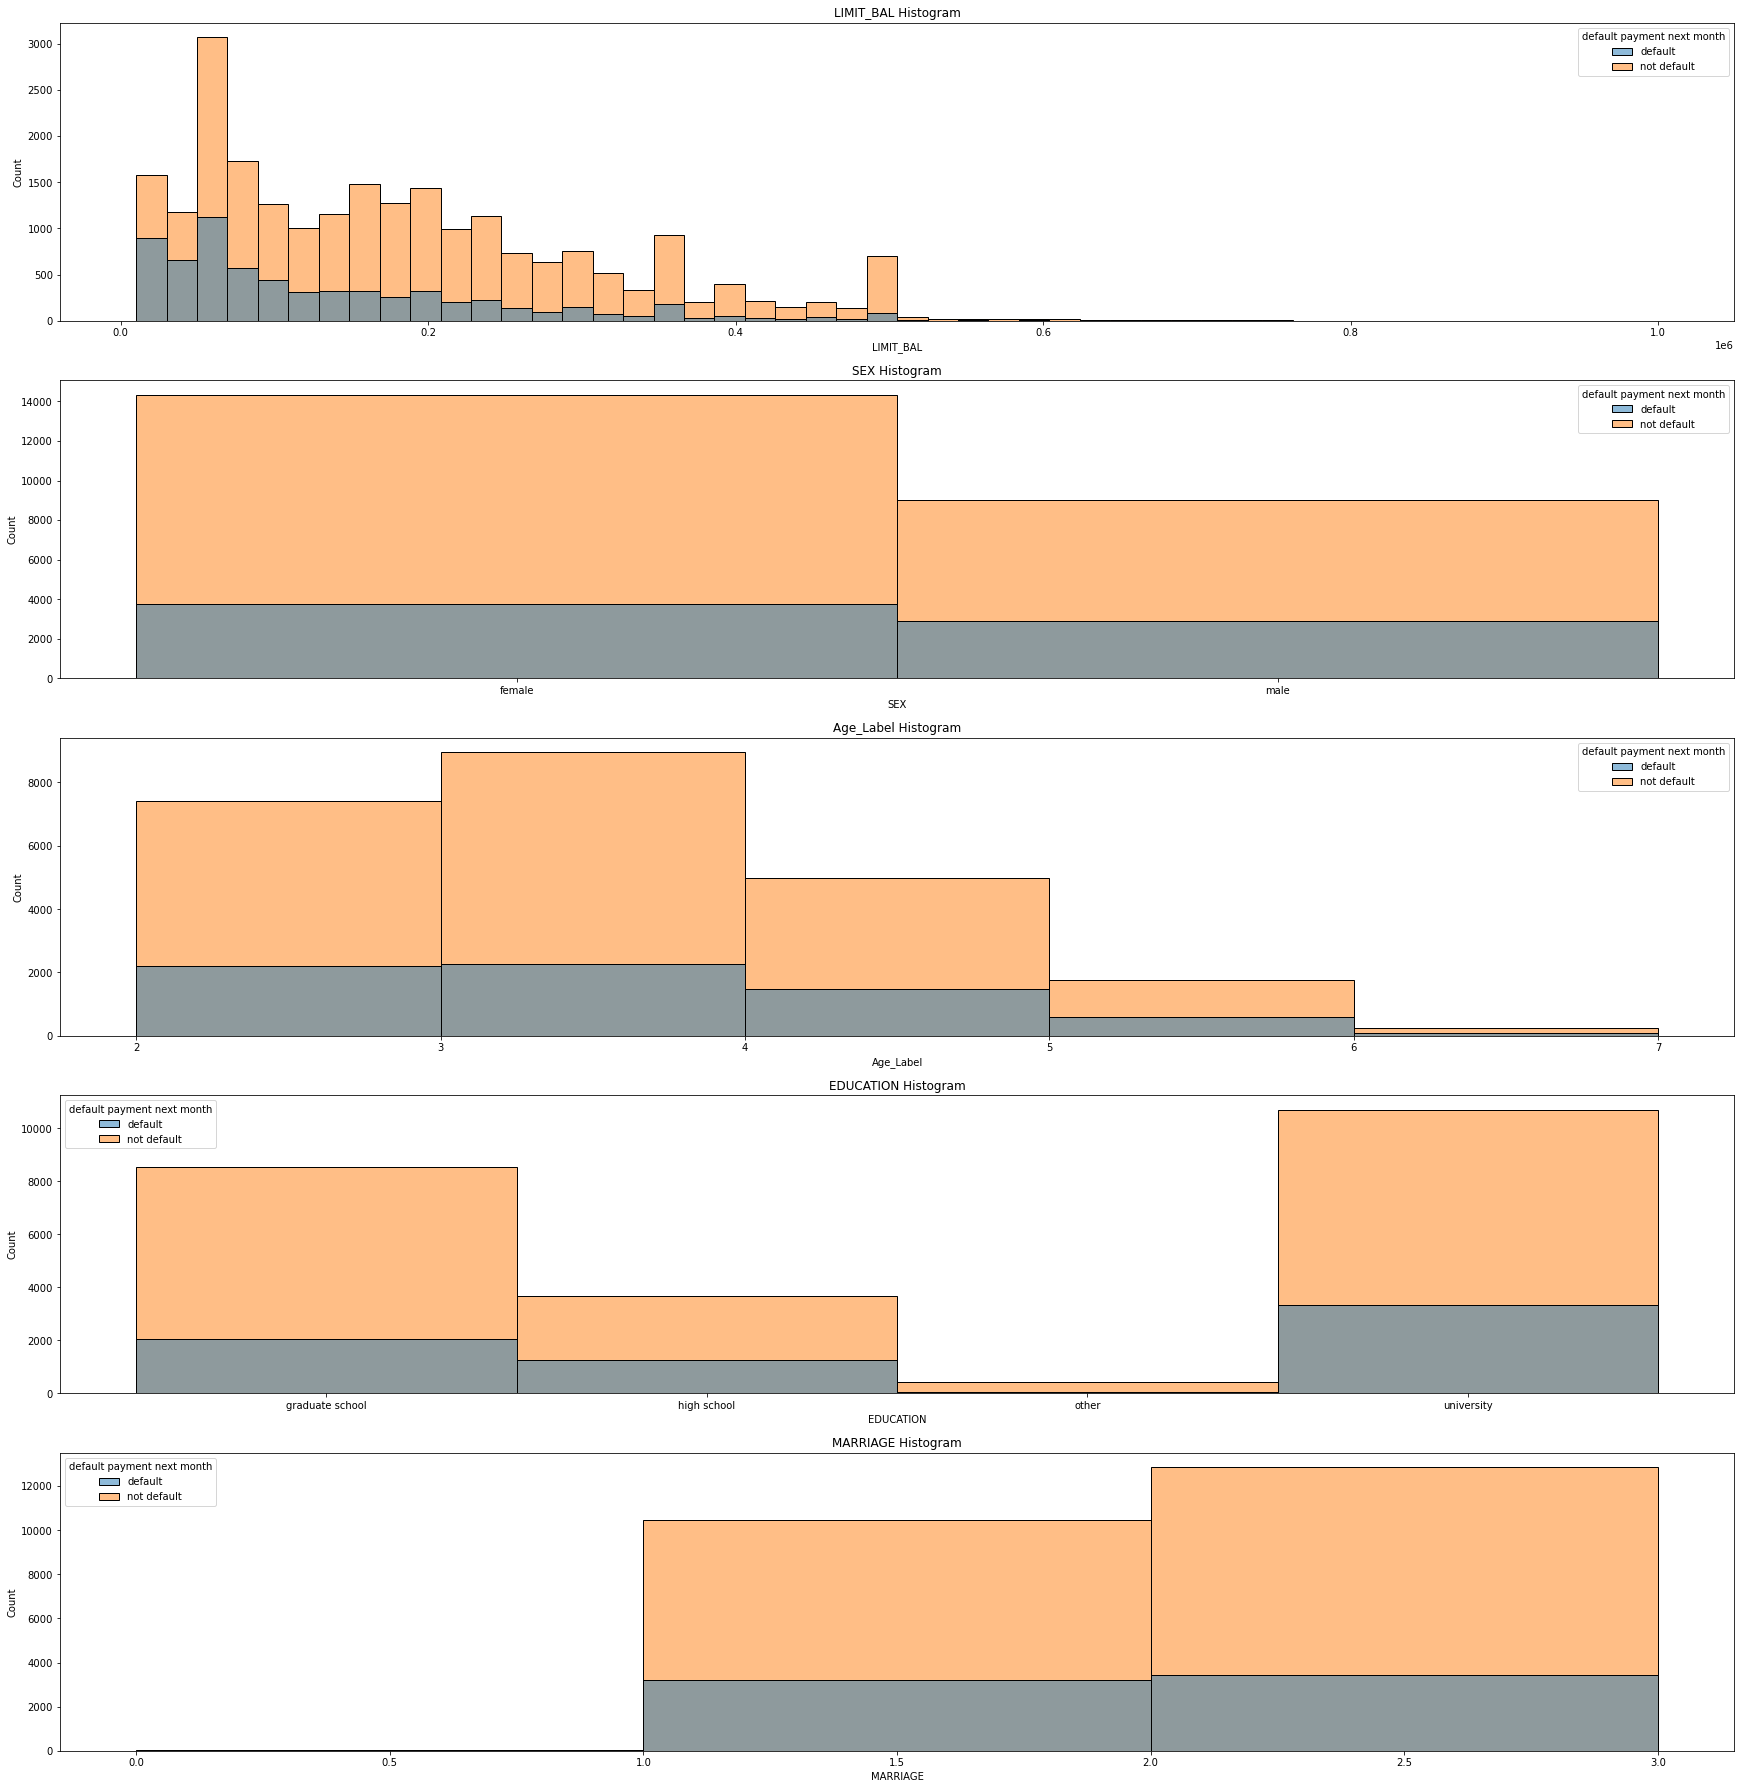

In [139]:
fig, axes = plt.subplots(5, 1, figsize=(30,30)) 
# Adjust the subplot layout parameters
fig.subplots_adjust(bottom=0.1, top=0.9,)

sns.histplot(ax=axes[0], data=data, x="LIMIT_BAL", bins=50, hue='default payment next month')
axes[0].set_title("LIMIT_BAL Histogram")

sns.histplot(ax=axes[1], data=data, x="SEX", binwidth=1, hue='default payment next month')
axes[1].set_title("SEX Histogram")

sns.histplot(ax=axes[2], data=data, x="Age_Label", binwidth=1, hue='default payment next month')
axes[2].set_title("Age_Label Histogram")

sns.histplot(ax=axes[3], data=data, x="EDUCATION", binwidth=1, hue='default payment next month')
axes[3].set_title("EDUCATION Histogram")

sns.histplot(ax=axes[4], data=data, x="MARRIAGE", binwidth=1, hue='default payment next month')
axes[4].set_title("MARRIAGE Histogram")



Text(0.5, 1.0, 'PAY_5 vs PAY_6')

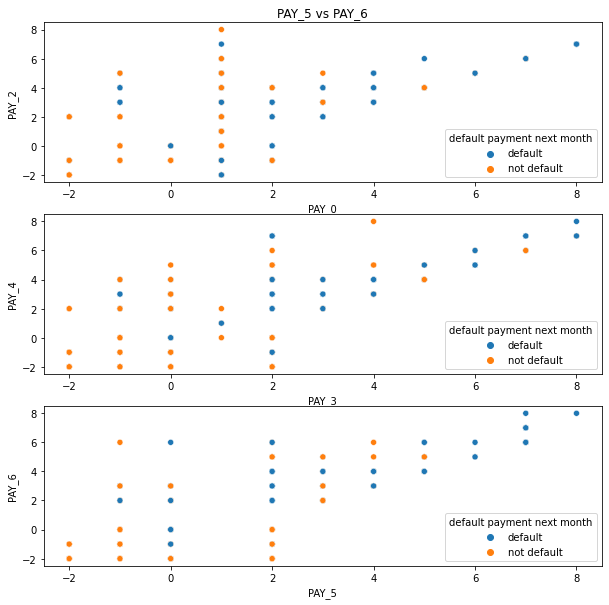

In [76]:
fig, axes = plt.subplots(3, 1, figsize=(10,10)) 

sns.scatterplot(ax=axes[0], data=data, x="PAY_0", y="PAY_2", hue='default payment next month')
axes[0].set_title("PAY_0 vs PAY_2")

sns.scatterplot(ax=axes[1], data=data, x="PAY_3", y="PAY_4", hue='default payment next month')
axes[0].set_title("PAY_3 vs PAY_4")

sns.scatterplot(ax=axes[2], data=data, x="PAY_5", y="PAY_6", hue='default payment next month')
axes[0].set_title("PAY_5 vs PAY_6")



Text(0.5, 1.0, 'PAY_6 Histogram')

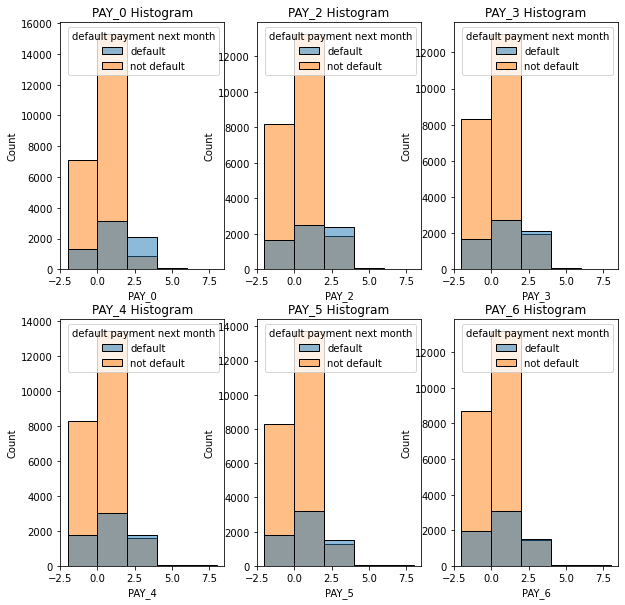

In [140]:
fig, axes = plt.subplots(2,3, figsize=(10,10)) 

sns.histplot(ax=axes[0,0], data=data, x="PAY_0", binwidth=2, hue='default payment next month')
axes[0,0].set_title("PAY_0 Histogram")

sns.histplot(ax=axes[0,1], data=data, x="PAY_2", binwidth=2, hue='default payment next month')
axes[0,1].set_title("PAY_2 Histogram")

sns.histplot(ax=axes[0,2], data=data, x="PAY_3", binwidth=2, hue='default payment next month')
axes[0,2].set_title("PAY_3 Histogram")

sns.histplot(ax=axes[1,0], data=data, x="PAY_4", binwidth=2, hue='default payment next month')
axes[1,0].set_title("PAY_4 Histogram")

sns.histplot(ax=axes[1,1], data=data, x="PAY_5", binwidth=2, hue='default payment next month')
axes[1,1].set_title("PAY_5 Histogram")

sns.histplot(ax=axes[1,2], data=data, x="PAY_6", binwidth=2, hue='default payment next month')
axes[1,2].set_title("PAY_6 Histogram")

#, log_scale=True

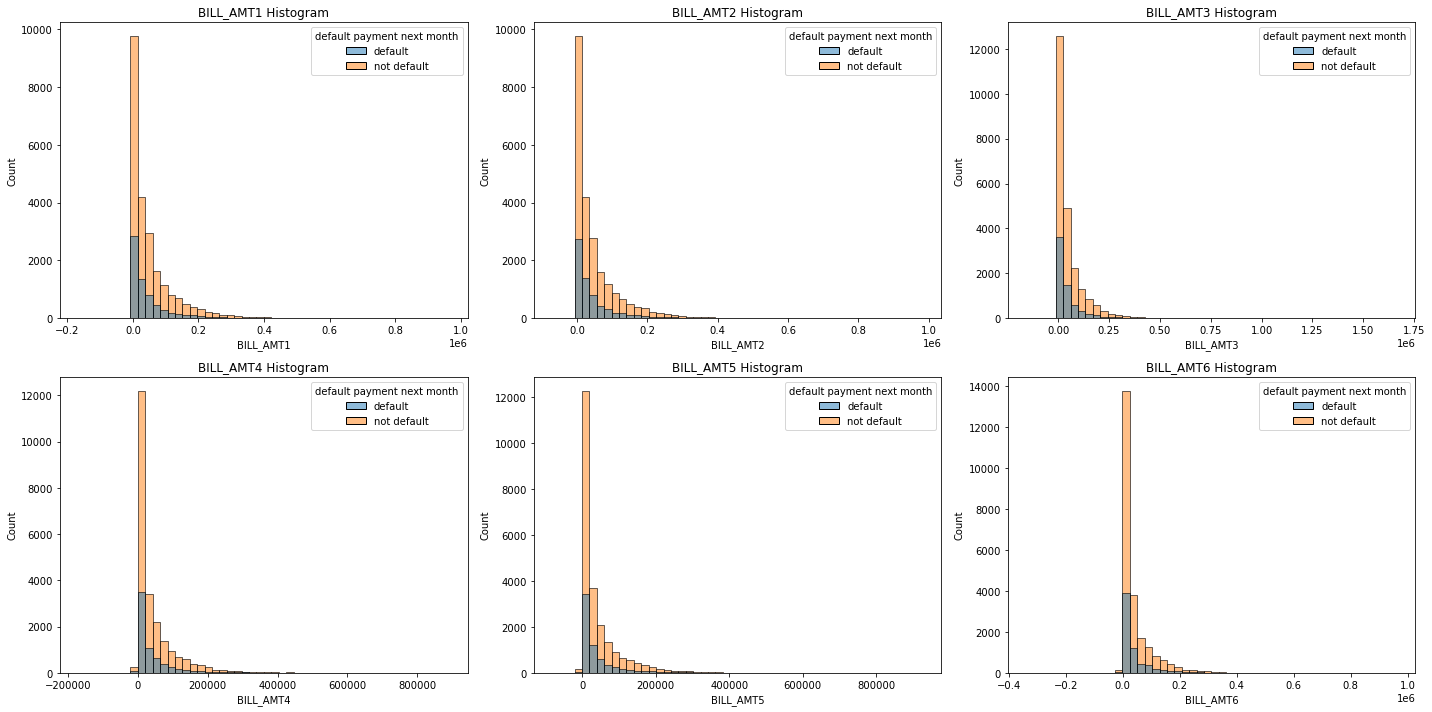

In [120]:
fig, axes = plt.subplots(2, 3, figsize=(20,10)) 

sns.histplot(ax=axes[0,0], data=data, x="BILL_AMT1", bins=50, hue='default payment next month')
axes[0,0].set_title("BILL_AMT1 Histogram")

sns.histplot(ax=axes[0,1], data=data, x="BILL_AMT2", bins=50, hue='default payment next month')
axes[0,1].set_title("BILL_AMT2 Histogram")

sns.histplot(ax=axes[0,2], data=data, x="BILL_AMT3", bins=50, hue='default payment next month')
axes[0,2].set_title("BILL_AMT3 Histogram")

sns.histplot(ax=axes[1,0], data=data, x="BILL_AMT4", bins=50, hue='default payment next month')
axes[1,0].set_title("BILL_AMT4 Histogram")

sns.histplot(ax=axes[1,1], data=data, x="BILL_AMT5", bins=50, hue='default payment next month')
axes[1,1].set_title("BILL_AMT5 Histogram")

sns.histplot(ax=axes[1,2], data=data, x="BILL_AMT6", bins=50, hue='default payment next month')
axes[1,2].set_title("BILL_AMT6 Histogram")

fig.tight_layout()

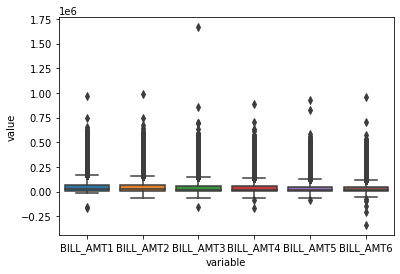

In [109]:
df = pd.DataFrame(data=data, columns=["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()
fig.tight_layout()

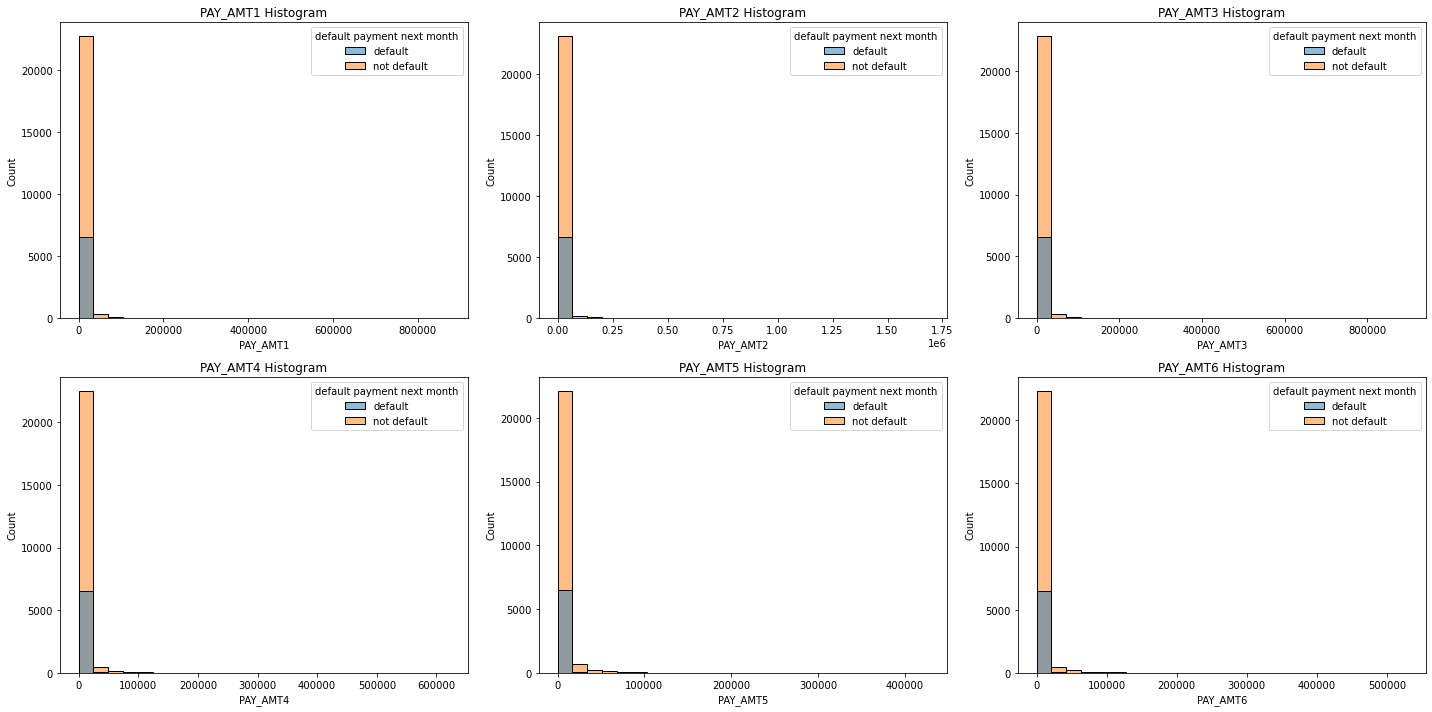

In [129]:
fig, axes = plt.subplots(2, 3, figsize=(20,10)) 

sns.histplot(ax=axes[0,0], data=data, x="PAY_AMT1", bins=25, hue='default payment next month')
axes[0,0].set_title("PAY_AMT1 Histogram")

sns.histplot(ax=axes[0,1], data=data, x="PAY_AMT2", bins=25, hue='default payment next month')
axes[0,1].set_title("PAY_AMT2 Histogram")

sns.histplot(ax=axes[0,2], data=data, x="PAY_AMT3", bins=25, hue='default payment next month')
axes[0,2].set_title("PAY_AMT3 Histogram")

sns.histplot(ax=axes[1,0], data=data, x="PAY_AMT4", bins=25, hue='default payment next month')
axes[1,0].set_title("PAY_AMT4 Histogram")

sns.histplot(ax=axes[1,1], data=data, x="PAY_AMT5", bins=25, hue='default payment next month')
axes[1,1].set_title("PAY_AMT5 Histogram")

sns.histplot(ax=axes[1,2], data=data, x="PAY_AMT6", bins=25, hue='default payment next month')
axes[1,2].set_title("PAY_AMT6 Histogram")

fig.tight_layout()


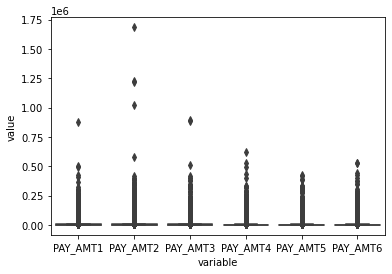

In [41]:
df = pd.DataFrame(data=data, columns=["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

- As the LIMIT_BAL increases the frequency of defaults are reduced
- There are more Female than Male customers
- Majority of customers have attended secondary education
- Most customers are Married or Single
- The number of defaults is consistent across the past payment period information
- Least number of defaults occur in past payment period -2 to 2
- Majority of defaults fall in past payment periods greater than 2
- The BILL_AMT and PAY_AMT information is consistent


6. Analyze data 

In [18]:
# Covariance matrix for the data

cov_mat = data.cov()

print(cov_mat)

                                  ID     LIMIT_BAL     MARRIAGE  \
ID                      7.500250e+07  2.941664e+07  -131.452515   
LIMIT_BAL               2.941664e+07  1.683446e+10 -7323.669658   
MARRIAGE               -1.314525e+02 -7.323670e+03     0.272452   
AGE                     1.491057e+03  1.730767e+05    -1.992764   
PAY_0                  -2.975726e+02 -3.954593e+04     0.011683   
PAY_2                  -1.162770e+02 -4.603765e+04     0.015122   
PAY_3                  -1.916922e+02 -4.443225e+04     0.020421   
PAY_4                  -2.769132e+01 -4.057181e+04     0.020213   
PAY_5                  -2.178600e+02 -3.667056e+04     0.021074   
PAY_6                  -2.018774e+02 -3.509308e+04     0.020616   
BILL_AMT1               1.236447e+07  2.727020e+09  -902.154685   
BILL_AMT2               1.108392e+07  2.570130e+09  -802.517866   
BILL_AMT3               1.462688e+07  2.548533e+09  -901.679085   
BILL_AMT4               2.248126e+07  2.453926e+09  -783.88159

In [19]:
# Correlation matrix for the data using the Pearson method

corr_mat = data.corr(method ='pearson')

print(corr_mat)

                              ID  LIMIT_BAL  MARRIAGE       AGE     PAY_0  \
ID                      1.000000   0.026179 -0.029079  0.018678 -0.030575   
LIMIT_BAL               0.026179   1.000000 -0.108139  0.144713 -0.271214   
MARRIAGE               -0.029079  -0.108139  1.000000 -0.414170  0.019917   
AGE                     0.018678   0.144713 -0.414170  1.000000 -0.039447   
PAY_0                  -0.030575  -0.271214  0.019917 -0.039447  1.000000   
PAY_2                  -0.011215  -0.296382  0.024199 -0.050148  0.672164   
PAY_3                  -0.018494  -0.286123  0.032688 -0.053048  0.574245   
PAY_4                  -0.002735  -0.267460  0.033122 -0.049722  0.538841   
PAY_5                  -0.022199  -0.249411  0.035629 -0.053826  0.509426   
PAY_6                  -0.020270  -0.235195  0.034345 -0.048773  0.474553   
BILL_AMT1               0.019389   0.285430 -0.023472  0.056239  0.187068   
BILL_AMT2               0.017982   0.278314 -0.021602  0.054283  0.189859   

In [20]:
# Correlation matrix for the data using the Spearman method

corr_mat = data.corr(method ='spearman')

print(corr_mat)

                              ID  LIMIT_BAL  MARRIAGE       AGE     PAY_0  \
ID                      1.000000   0.030636 -0.028316  0.024727 -0.025029   
LIMIT_BAL               0.030636   1.000000 -0.113535  0.186485 -0.296461   
MARRIAGE               -0.028316  -0.113535  1.000000 -0.462810  0.023312   
AGE                     0.024727   0.186485 -0.462810  1.000000 -0.063733   
PAY_0                  -0.025029  -0.296461  0.023312 -0.063733  1.000000   
PAY_2                  -0.004919  -0.342596  0.036950 -0.083271  0.627170   
PAY_3                  -0.009176  -0.331615  0.041867 -0.083192  0.548112   
PAY_4                  -0.004307  -0.308658  0.044805 -0.080190  0.516156   
PAY_5                  -0.015982  -0.284936  0.046881 -0.083149  0.486441   
PAY_6                  -0.006298  -0.264105  0.044305 -0.076144  0.463892   
BILL_AMT1               0.010934   0.054384  0.003490  0.001019  0.314574   
BILL_AMT2               0.009675   0.048586  0.005613  0.001513  0.329814   

                                   sum
                             LIMIT_BAL
default payment next month            
default                      863407680
not default                 4161122000


<AxesSubplot:xlabel='default payment next month'>

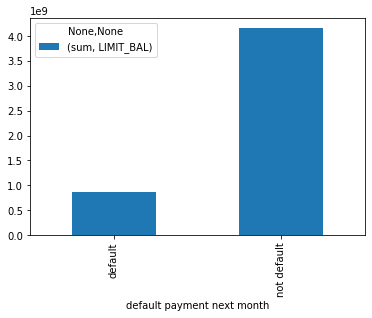

In [66]:
# Count and Sum of all Transactions by default payment next month

TrxTotal = pd.pivot_table(data, index =['default payment next month'], values=["LIMIT_BAL"], 
               aggfunc=[np.sum]).round()

print(TrxTotal)

TrxTotal.plot(kind='bar')

               sum
         LIMIT_BAL
SEX               
female  3080606000
male    1943923680


<AxesSubplot:xlabel='SEX'>

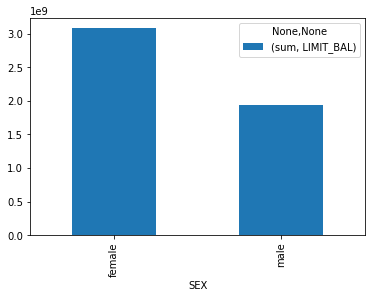

In [69]:
# Sum of LIMIT_BAL by Sex

TrxTotal = pd.pivot_table(data, index =['SEX'], values=["LIMIT_BAL"], 
               aggfunc=[np.sum]).round()

print(TrxTotal)

TrxTotal.plot(kind='bar')

                  sum
            LIMIT_BAL
Age_Label            
2          1194640000
3          2213900000
4          1168599680
5           383710000
6            58210000
7             5470000


<AxesSubplot:xlabel='Age_Label'>

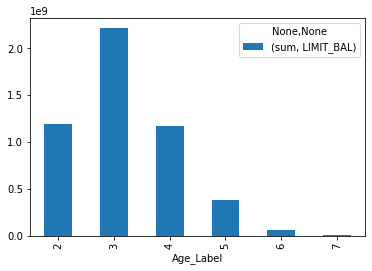

In [74]:
# Sum of LIMIT_BAL by Age_Label

TrxTotal = pd.pivot_table(data, index =['Age_Label'], values=["LIMIT_BAL"], 
               aggfunc=[np.sum]).round()

print(TrxTotal)

TrxTotal.plot(kind='bar')

                        sum
                  LIMIT_BAL
EDUCATION                  
graduate school  2254140000
high school       622247680
other              84856000
university       2063286000


<AxesSubplot:xlabel='EDUCATION'>

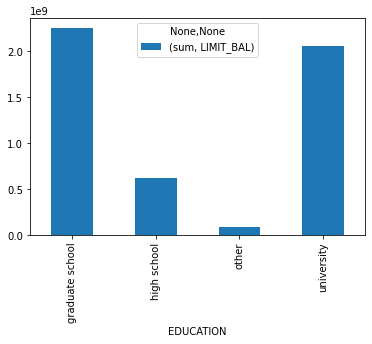

In [71]:
# Sum of LIMIT_BAL by EDUCATION

TrxTotal = pd.pivot_table(data, index =['EDUCATION'], values=["LIMIT_BAL"], 
               aggfunc=[np.sum]).round()

print(TrxTotal)

TrxTotal.plot(kind='bar')

                 sum
           LIMIT_BAL
MARRIAGE            
0            7180000
1         2488682000
2         2496987680
3           31680000


<AxesSubplot:xlabel='MARRIAGE'>

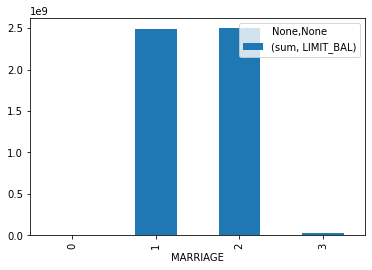

In [72]:
# Sum of LIMIT_BAL by MARRIAGE

TrxTotal = pd.pivot_table(data, index =['MARRIAGE'], values=["LIMIT_BAL"], 
               aggfunc=[np.sum]).round()

print(TrxTotal)

TrxTotal.plot(kind='bar')



                                 len            
                           LIMIT_BAL            
default payment next month   default not default
SEX    Age_Label                                
female 2                        1408        4929
       3                        1226        5447
       4                         794        2899
       5                         287         962
       6                          45         103
       7                           3           9
male   2                         789        2492
       3                        1050        3515
       4                         691        2080
       5                         295         797
       6                          44         122
       7                           4           9


<AxesSubplot:xlabel='SEX,Age_Label'>

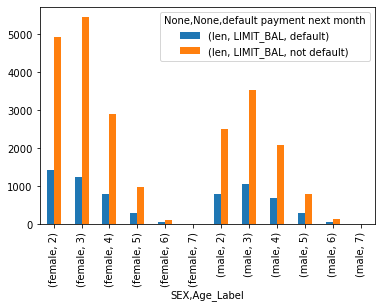

In [97]:
# Count of all Transactions by default payment next month

TrxTotal = pd.pivot_table(data, index =['SEX', 'Age_Label'], values=["LIMIT_BAL"], 
               columns=["default payment next month"],aggfunc=[len]).round()

print(TrxTotal)

TrxTotal.plot(kind='bar')

                                 len            
                           LIMIT_BAL            
default payment next month   default not default
SEX    LIMIT_BAL_Label                          
female 1                        1249        2702
       2                        1159        3813
       3                         790        4160
       4                         565        3674
male   1                        1191        2534
       2                         723        1919
       3                         536        2157
       4                         423        2405


<AxesSubplot:xlabel='SEX,LIMIT_BAL_Label'>

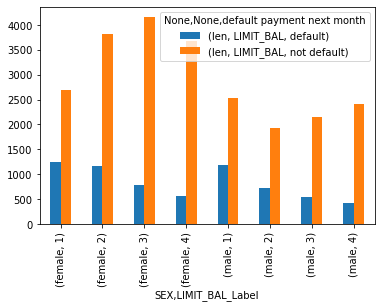

In [83]:
# Count of all Transactions by default payment next month

TrxTotal = pd.pivot_table(data, index =['SEX', 'LIMIT_BAL_Label'], values=["LIMIT_BAL"], 
               columns=["default payment next month"],aggfunc=[len]).round()

print(TrxTotal)

TrxTotal.plot(kind='bar')

<AxesSubplot:xlabel='Age_Label', ylabel='LIMIT_BAL_Label'>

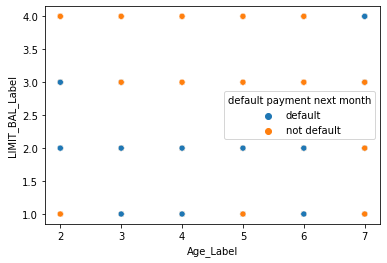

In [87]:
sns.scatterplot(data=data, x="Age_Label", y="LIMIT_BAL_Label", hue='default payment next month')

- There is a correlation between pay status (PAY_0 to PAY_6)
- There is a correlation between amount bill statement (BILL_AMT1 and BILL_AMT6)
- Approximately 20% of all customers marked as default for next month
- Younger customers appear to be less likely to default overall
- Males despite having less representation in the data appear to have similar default rates as females

<AxesSubplot:xlabel='Age_Label', ylabel='LIMIT_BAL'>

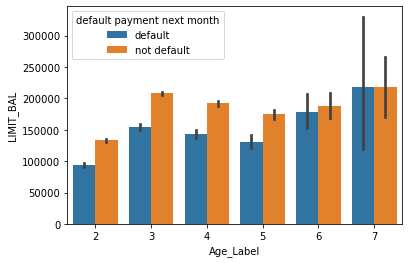

In [24]:
sns.barplot(data=data, x="Age_Label", y="LIMIT_BAL", hue='default payment next month')

<AxesSubplot:xlabel='BILL_AMT1', ylabel='PAY_AMT1'>

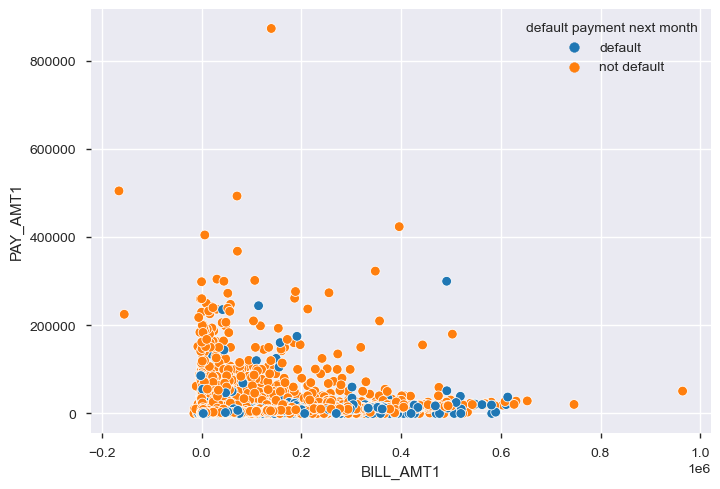

In [35]:
sns.scatterplot(data=data, y="PAY_AMT1", x="BILL_AMT1", hue='default payment next month')

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

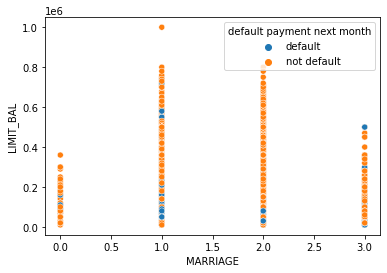

In [26]:
sns.scatterplot(data=data, x="MARRIAGE", y="LIMIT_BAL", hue='default payment next month')